# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Task 1: Import Libraries

In [14]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.1.0


# Task 2: Rotation

In [15]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rotation_range=40
)

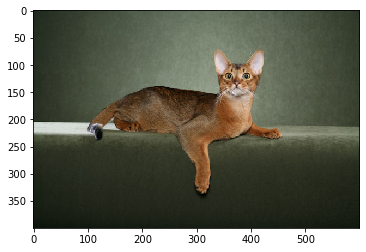

In [16]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


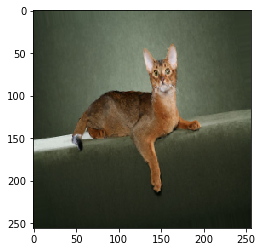

In [17]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [24]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    width_shift_range=[-100,-50,0,50,100],
    
    height_shift_range=[-50, 0,50]
)

Found 1 images belonging to 1 classes.


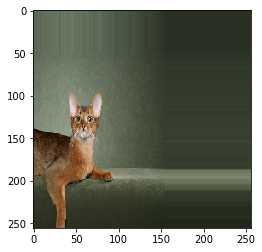

In [26]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 1 classes.


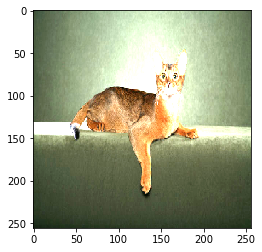

In [29]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    brightness_range=(0.5,2.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 1 classes.


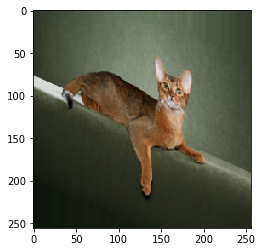

In [33]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    shear_range=40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 1 classes.


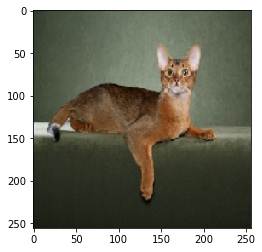

In [46]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    zoom_range=0.5
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 1 classes.


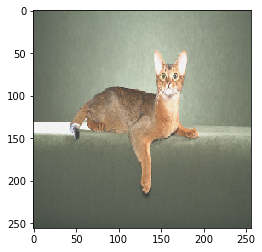

In [54]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [55]:
x.mean()

127.96206

# Task 8: Flips

Found 1 images belonging to 1 classes.


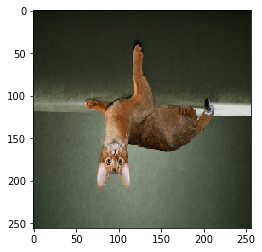

In [59]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    horizontal_flip=True,
    vertical_flip=True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [61]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    featurewise_center=True,
    featurewise_std_normalization=True
)

generator.fit(x_train)

In [62]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

0.61085993 0.77256435 [[8]]
120.70756512369792


### Samplewise

In [63]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

4.967054e-09 1.0 [[5]]


# Task 10: Rescale and Preprocessing Function

In [65]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rescale=1.,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [66]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [67]:
print(x.mean(), x.std(), y)

0.32033038 0.54062086 [[2]]


# Task 11: Using in Model Training

In [69]:
# Your code here
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rescale=1.,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip=True,
    rotation_range=20
)

In [75]:
# Your code here
model=tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top=False,input_shape=(32,32,3),
        pooling='avg'
    ),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(
loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [76]:
_=model.fit(
generator.flow(x_train,y_train,batch_size=32),
epochs=1,steps_per_epoch=10
)

  ...
    to  
  ['...']
Train for 10 steps
10/10 [==============================] - 13s 1s/step - loss: 2.9735 - accuracy: 0.1562
